In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# załadowanie ramki danych
url = "https://raw.githubusercontent.com/MarylaSosna/umwf_projekt/main/df_all.csv"
df_all = pd.read_csv(url, sep=",")
df_all = df_all.drop(columns="Unnamed: 0")
df_all["Date"] = pd.to_datetime(df_all["Date"], format="%Y-%m-%d")
df_all.head()

,Close,Comp,Date,ROR_month,ROR_qtr,ROR_half_year,ROR_year,Score,Oil,Gold,USD to Yuan,Category
0,6.163362,UBA,2004-03-24,0.083411,NaN,NaN,NaN,0.741122,37.009998,417.200012,8.267201,8
1,7.158419,UBA,2005-06-15,0.087692,0.098211,0.032070,0.254842,0.803913,55.570000,429.100006,8.266501,8
2,7.281594,UBA,2005-06-29,0.045381,0.134050,0.014216,0.223035,0.806620,57.259998,NaN,8.266501,8
3,7.605220,UBA,2005-07-13,0.066313,0.228741,0.148893,0.219617,0.923381,60.009998,423.899994,8.266501,8
4,7.613519,UBA,2005-07-27,0.062501,0.249711,0.149382,0.305484,0.923270,59.110001,424.700012,8.102800,8


In [3]:
# Usuwanie wartości pustych
df_clear = df_all.dropna()

In [4]:
df_clear.shape

(28601, 12)

# Wizualizacje

## Korelacja zmiennych

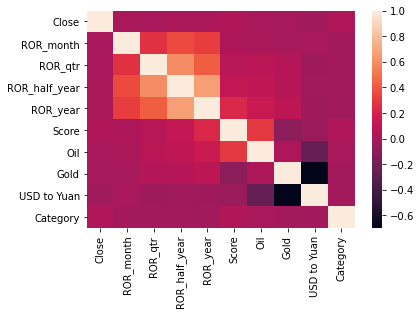

In [8]:
corr = df_clear.corr()
mapa = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Oil, Gold, USD to Yuan na przestrzeni lat

In [22]:
def plots(value):
    ax1 = sns.set_style(style=None, rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10} )
    fig, ax1 = plt.subplots(figsize=(16,6))
    plt.title(value, fontsize = 14)
    sns.lineplot(x=df_clear["Date"], y = df_clear[value].index.values, ax=ax1, color = '#ff9900')
    ax1.set(xlabel='Date')
    plt.xticks(rotation=45)
    plt.gcf().autofmt_xdate()

### Oil

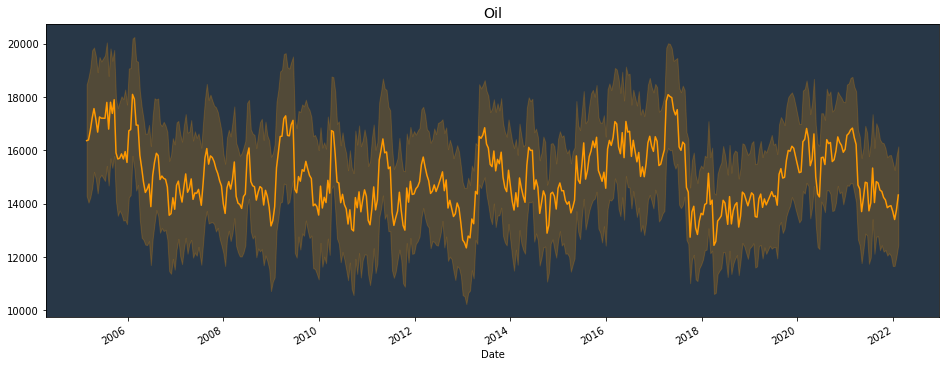

In [19]:
plots("Oil")

### Gold

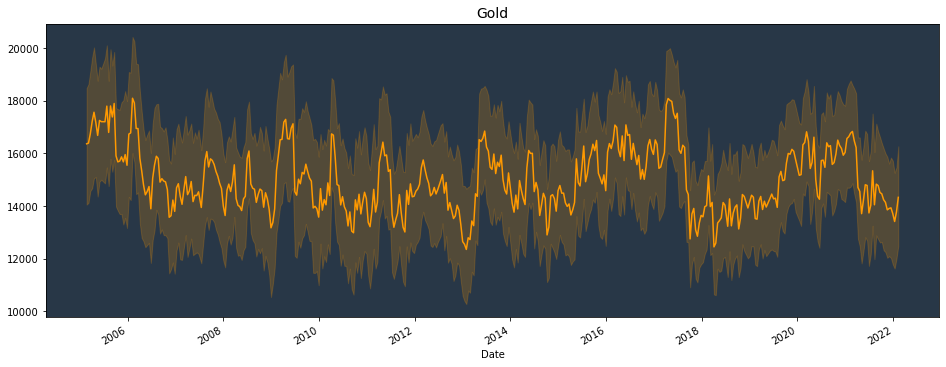

In [20]:
plots("Gold")

### USD to Yuan

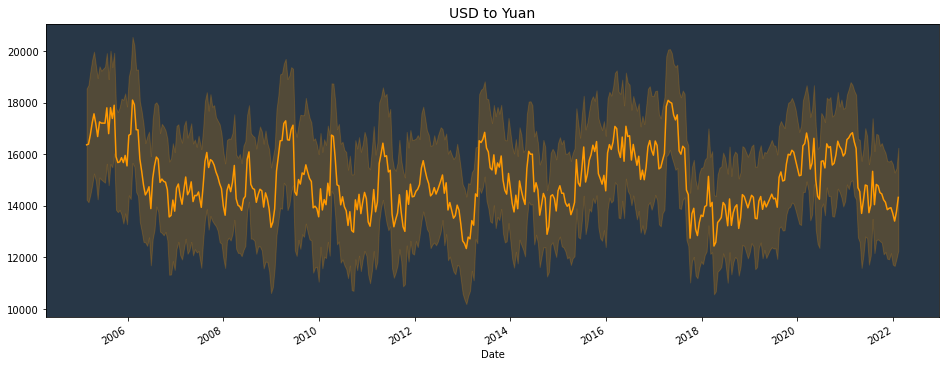

In [21]:
plots("USD to Yuan")

## Katgorie

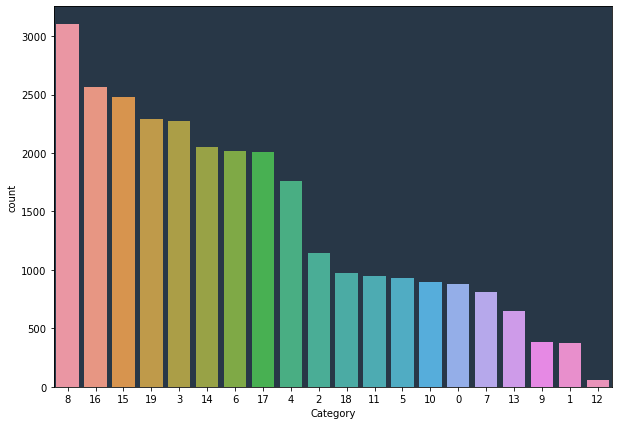

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(df_clear['Category'], order=df_clear['Category'].value_counts().index)
plt.show()